In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn import linear_model
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('TOP500_202106.csv', header =  0, sep = ';')

### Задание 1. 

#### 50% На основании данных рейтинга top500 спрогнозировать  производительность компьютера №1 в 2025

Подготовим данные для 1 задания из рейтинга top500

Компьютеры малой мощности будут использоваться во все времена, поэтому будем предсказывать только топ по годам

In [3]:
df_task1 = df[['Year', 'Rmax [TFlop/s]']]

df_task1['Rmax [TFlop/s]'] = df_task1['Rmax [TFlop/s]'].str.replace('[^\x00-\x7F]','') \
    .str.replace(',', '.').astype(float)

df_task1 = df_task1.groupby('Year').max()
df_task1

,Rmax [TFlop/s]
Year,
2010,2566.00
2011,1653.92
2013,5283.11
2014,3577.00
2015,5536.99
2016,93014.59
2017,21230.00
2018,148600.00
2019,23516.40


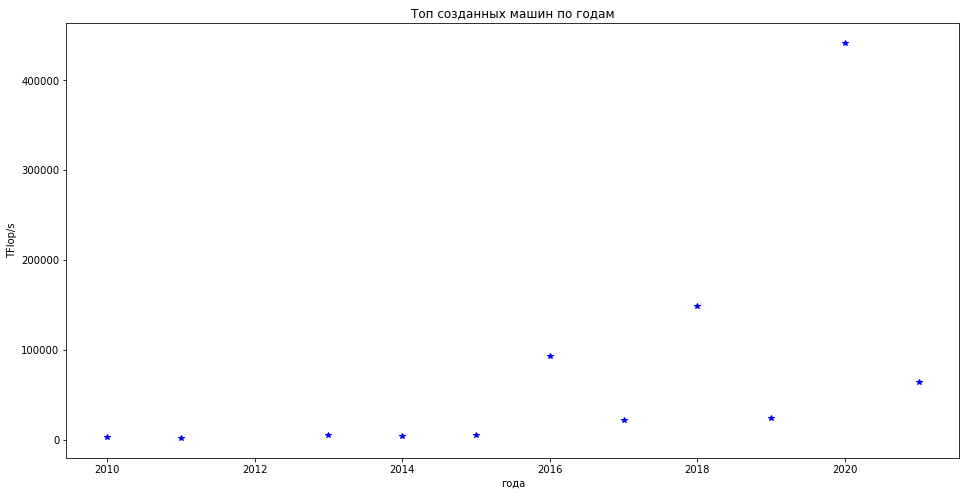

In [4]:
plt.figure(figsize=(16, 8))
plt.title("Топ созданных машин по годам")
plt.xlabel("года")
plt.ylabel("TFlop/s")
plt.plot(df_task1.index, df_task1[['Rmax [TFlop/s]']], 'bo', marker='*')

По графику видно, что не каждый год создавались более мощные суперкомпьютеры. 

Можно было бы сказать про сезонность, начиная с 2016 года. Прогресс идет через год, но на мой субъективный взгляд для сезонности слишком мало данных. Тем более 2021 год использовать в расчетах нельзя, т.к. данные неполные

На лекции речь шла об экспоненциальном росте, поэтому прологарифмируем данные и обучим линейную регрессию.

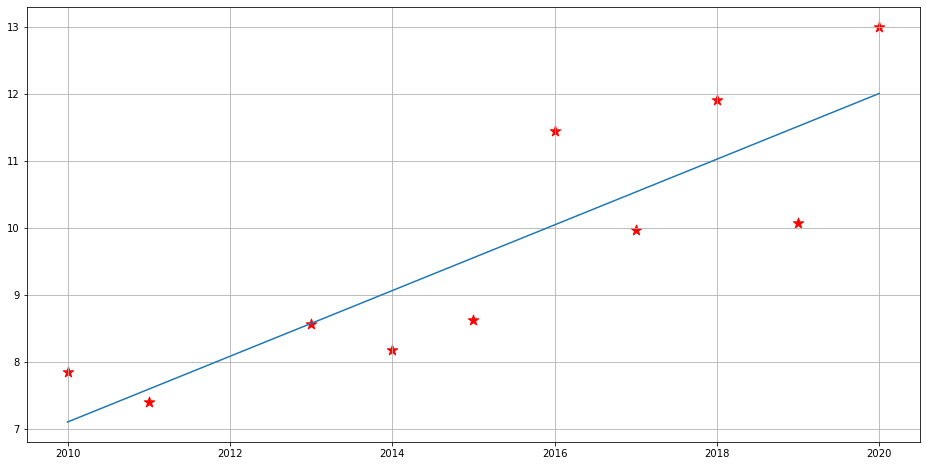

In [5]:
x = np.array(df_task1[df_task1.index < 2021].index)
plt.figure(figsize=(16, 8))

plt.scatter(x, np.log(df_task1[df_task1.index < 2021])['Rmax [TFlop/s]'].values, marker='*', s=120, c='r')

cur_model = linear_model.LinearRegression(fit_intercept=True).fit(
    x.reshape(-1, 1),
    np.log(df_task1[df_task1.index < 2021])['Rmax [TFlop/s]'].values
)

plt.plot(x, cur_model.predict(x.reshape(-1, 1)))
plt.grid(True)

plt.show()

In [6]:
def true_curve(x):
    return np.exp(cur_model.intercept_ + cur_model.coef_ * x)

In [7]:
cur_model.intercept_, cur_model.coef_

(-977.344688584059, array([0.48977616]))

In [8]:
px = np.arange(2010, 2026, 1)
px

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2023, 2024, 2025])

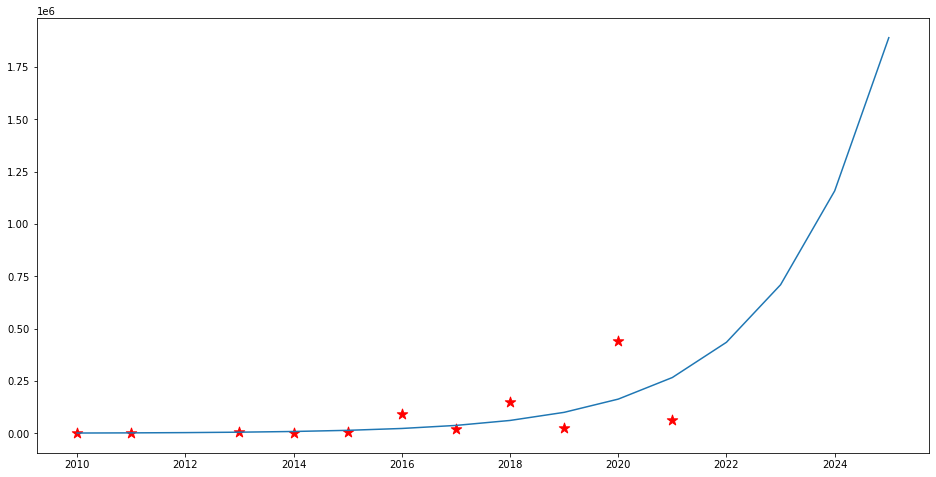

In [9]:
plt.figure(figsize=(16, 8))


x = np.append(x, 2021)
plt.scatter(x, df_task1['Rmax [TFlop/s]'].values, marker='*', s=120, c='r')

px = np.arange(2010, 2026, 1)
plt.plot(px, true_curve(px), label="Через линейную регрессию")


In [10]:
true_curve(2025)[0]

1889889.1304499118

Получается в районе 1889889 TFlop/s или 1.9 EFlop/s. С учетом того, что прогресс будет не каждый год

### Задание 2. 

#### 50% оцените какой процент всего производимого на Земле электричества потребляют все компьютеры из top500 (на основании открытых данных top500.org)

На лекции было сказано о средних значениях мощности на MFlop / s в виде 10 MFlop / s на 1 W

Получается на поддержание 1 TFlop / s нужно в среднем 100kW или $10^{-7}$TW

Путем несложных математических вычислений можно посчитать сколько потребуется энергии за час:

In [11]:
TFlop_h = 1e-7 * 60 * 60

print(str(TFlop_h) + "TWh на 1 TFlop / s")

0.00036TWh на 1 TFlop / s


К сожалению данные о произведенной электроэнергии доступны только за 2020 год, например, на сайте:
https://yearbook.enerdata.ru/electricity/world-electricity-production-statistics.html

С учетом того, что пандемия не закончилась и производственный кризис продолжается, будем считать, что производство энергии остаётся на прежнем уровни и составляют 26907 TWh

Найдем суммарный TFlop / s по данным top500

In [12]:
df_task2 = df[['Rmax [TFlop/s]']]

df_task2['Rmax [TFlop/s]'] = df_task2['Rmax [TFlop/s]'].str.replace('[^\x00-\x7F]','') \
    .str.replace(',', '.').astype(float)

sum_TF = df_task2['Rmax [TFlop/s]'].sum()

print ("Суммарный TFlop / s = " + str(sum_TF))

Суммарный TFlop / s = 2786058.8


Следовательно для поддержания работы требуется в районе:

In [13]:
result = sum_TF * TFlop_h

print (str(result) + "TWh")

1002.981168TWh


In [14]:
print(str(result / 26907 * 100) + '%')

3.7275845244731856%


Получается потребление в районе 3.73% от общей произведенной энергии

### Задание 2. 

#### 10% Бонус: Улучшить производительность программы с реализацией алгоритма матричного умножения (сниппет https://bit.ly/339RAhp )

Ничего особенного не придумал. убрал повторяющие операции умножения и сложения. Код в папке. 

Вот пример расчетов, последняя функция моя.

<img src="https://i.ibb.co/smgY83H/image.png"  width = 500/>